## Liam Lindy
### Sentiment Analysis on Scraped Web Text
#### Working with Text

# README
1. this works by reading in the NLTK libraries
2. pulling in the simple HTML text of the page (would be a resume in our case)
3. parsing that using standard NLP libraies (scikit-learn could also be used)

In [15]:
import numpy as np
import pandas as pd
from scipy.spatial.distance import pdist, squareform
import matplotlib.pyplot as plt
%matplotlib inline

import nltk
import string
# May need this if not already installed
nltk.download('stopwords')
nltk.download('punkt')

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/liamlindy/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /Users/liamlindy/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

## This cell below processes the raw HTML information

In [16]:
import bs4 as BeautifulSoup
from bs4 import BeautifulSoup

f = open('liam-made-this.html')
html = f.read()

soup = BeautifulSoup(html, 'html.parser')
title = soup.title.get_text()
print('HTML Title:', title)

contents = soup.get_text(strip=True).replace('\n', ' ').replace('\r', '')


HTML Title:  Liam is AMAZING! 


In [17]:
all_docs = []
stemmer = nltk.stem.porter.PorterStemmer()
lowered = contents.lower()
no_punc = lowered.translate(str.maketrans('','', string.punctuation))
token = nltk.word_tokenize(no_punc)
nonstop = [w for w in token if not w in nltk.corpus.stopwords.words('english')]

token = [stemmer.stem(item) for item in nonstop]
all_docs = token
num_docs = len(all_docs)
print('processed', num_docs, 'documents.')
print('Six docs looks like this:', all_docs)

processed 331 documents.
Six docs looks like this: ['liam', 'amazinghello', 'name', 'liam', 'lindymagna', 'adipis', 'consequat', 'nulla', 'excepteur', 'eu', 'dolor', 'velit', 'dolor', 'nisi', 'incididunt', 'ad', 'veniam', 'dolor', 'aliqua', 'mollit', 'aut', 'dolor', 'ex', 'officia', 'ex', 'non', 'deserunt', 'labor', 'non', 'ess', 'labori', 'sunt', 'commodo', 'labori', 'commodo', 'eiusmod', 'labori', 'ullamco', 'occaecat', 'ipsum', 'commodo', 'aliqua', 'velit', 'elit', 'incididunt', 'veniam', 'consectetur', 'cupidatat', 'aliquaamet', 'ut', 'id', 'id', 'aliqua', 'cupidatat', 'irur', 'exercit', 'volupt', 'anim', 'velit', 'irur', 'excepteur', 'minim', 'labori', 'ad', 'culpa', 'irur', 'occaecat', 'veniam', 'nostrud', 'proident', 'ut', 'minim', 'nisi', 'officia', 'occaecat', 'exercit', 'ess', 'sint', 'ipsum', 'ad', 'nisi', 'irur', 'est', 'culpa', 'excepteur', 'eiusmod', 'sunt', 'elit', 'ad', 'tempor', 'nisi', 'volupt', 'sint', 'tempor', 'est', 'minim', 'sit', 'aliquip', 'mollit', 'deserunt',

#### 3f

In [18]:
tc = nltk.TextCollection(all_docs)

print('\nConcordances:')
tc.concordance('green')

# Build a frequency distribution from the TextCollection vocab 
fdist = tc.vocab() 
print('# times "green" used:', fdist['green']) 
# Number of unique words in the text 
unique_terms = list(fdist.keys()) 
num_terms = len(unique_terms) 
print('\nUnique terms:', num_terms) 
print('\nThe 10 Most common terms (automatically sorted):') 
print(fdist.most_common(10)) 


Concordances:
no matches
# times "green" used: 0

Unique terms: 24

The 10 Most common terms (automatically sorted):
[('i', 232), ('e', 183), ('t', 144), ('a', 142), ('n', 141), ('u', 132), ('o', 128), ('d', 110), ('l', 109), ('r', 105)]


In [19]:
 # Make a 2D array to hold the TF-IDF scores 
TD = np.zeros((num_docs, num_terms)) 
# Note that there are a couple ways to speed this next part up, # but they sacrifice clarity for speed. 
# Loop through each document 
for i in range(num_docs): 
# Loop through each term 
    for j in range(num_terms): 
# Grab the current document from the list of all the documents 
        doc = all_docs[i] 
        # Grab the current term from the list of all the unique terms 
        term = unique_terms[j] 
        # Calculate the TF-IDF score for the current term and document # and store it in the TD array 
        TD[i, j] = tc.tf_idf(term, doc) 
print('TD matrix created.') 
print('The columns correspond to the terms:') 
print(unique_terms) 
print('\nThe first document has these TD-IDF scores:') 
print(TD[:, :80])

TD matrix created.
The columns correspond to the terms:
['l', 'i', 'a', 'm', 'z', 'n', 'g', 'h', 'e', 'o', 'd', 'y', 'p', 's', 'c', 'q', 'u', 't', 'x', 'r', 'v', 'f', 'b', 'w']

The first document has these TD-IDF scores:
[[0.33986678 0.16076577 0.28232239 ... 0.         0.         0.        ]
 [0.22657785 0.05358859 0.18821492 ... 0.         0.         0.        ]
 [0.         0.         0.28232239 ... 0.         0.         0.        ]
 ...
 [0.         0.16076577 0.         ... 0.         0.         0.        ]
 [0.         0.10717718 0.18821492 ... 0.         0.         0.        ]
 [0.         0.21435436 0.         ... 0.         0.         0.        ]]


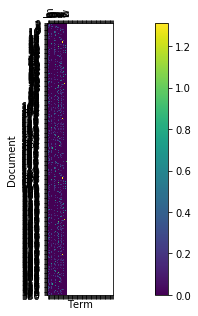

In [20]:
width = 15 
height = 5 
fig = plt.figure(figsize=(width, height)) 
ax = fig.add_subplot(111) 
cax = ax.matshow(TD[:,:80]) 
fig.colorbar(cax) 
plt.xticks(np.arange(80), unique_terms, rotation=90) 
plt.yticks(np.arange(num_docs), np.arange(num_docs)) 
plt.xlabel('Term') 
plt.ylabel('Document') 
plt.show()

#### 3g

In [21]:
# Calc distance matrix

dist = pdist(TD, metric='cosine')
dist = squareform(dist)
# Convert cosine distance to similarity
# (so that bigger numbers mean more similar)
sim = 1 - dist
print(sim.shape)

(331, 331)


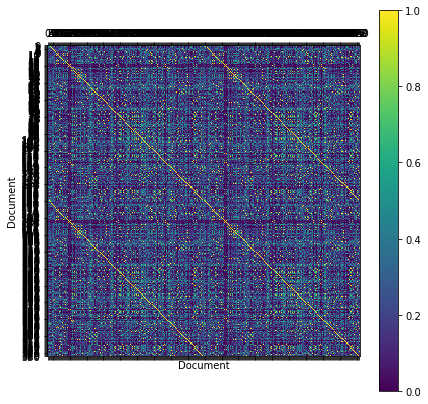

In [22]:
fig = plt.figure(figsize=(7, 7)) 
ax = fig.add_subplot(111)
cax = ax.matshow(sim) 
fig.colorbar(cax) 
plt.xticks(np.arange(num_docs), np.arange(num_docs)) 
plt.yticks(np.arange(num_docs), np.arange(num_docs))
plt.xlabel('Document') 
plt.ylabel('Document') 
plt.show() 

#### 3h

In [23]:
print('high similarity one')
print(sim[16,23])
print(all_docs[16], all_docs[23])

print('\nhigh similarity two')
print(sim[8,23])
print(all_docs[8], all_docs[23])

print('\nhigh similarity three')
print(sim[9,14])
print(all_docs[9], all_docs[14])

high similarity one
0.06505621342582457
veniam officia

high similarity two
0.047785050452984645
excepteur officia

high similarity three
0.15028021983495332
eu incididunt


#### 3i

In [24]:
print('low similarity one')
print(sim[0,5])
print(all_docs[0], all_docs[5])

print('\nlow similarity two')
print(sim[22,23])
print(all_docs[8], all_docs[23])

print('\nlow similarity three')
print(sim[3,20])
print(all_docs[3], all_docs[20])

low similarity one
0.28782765066814786
liam adipis

low similarity two
0.0
excepteur officia

low similarity three
0.32301942520290405
liam aut
